In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

/Users/deepankarsingh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
len(X_train)



60000

In [6]:
len(y_train)


60000

In [7]:
len(X_test)


10000

In [17]:
print(X_train.shape)

(60000, 28, 28)


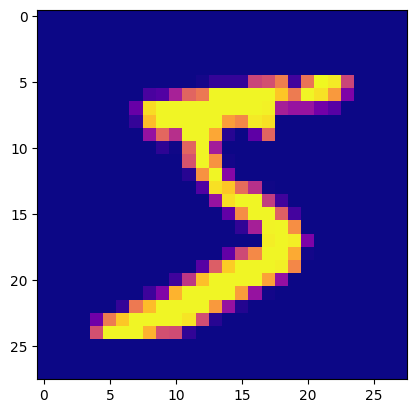

In [12]:
plt.imshow(X_train[0], cmap='plasma')

In [15]:
print(y_train[0])

5


In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [18]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [19]:
X_train_flattened.shape

(60000, 784)

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.8063 - loss: 0.7377
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.9144 - loss: 0.3061
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.9218 - loss: 0.2848
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - accuracy: 0.9263 - loss: 0.2670
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.9251 - loss: 0.2688


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.9124 - loss: 0.3048


[0.2677421271800995, 0.9253000020980835]

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step


array([2.3631634e-02, 4.8106125e-07, 6.0318835e-02, 9.5566881e-01,
       1.8486074e-03, 1.0188117e-01, 1.7472674e-06, 9.9972498e-01,
       7.4808747e-02, 6.6652423e-01], dtype=float32)

In [24]:
np.argmax(y_predicted[0])

np.int64(7)

In [25]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [26]:
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [27]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    7,    1,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   7,    9,  930,   18,    7,    3,   11,    8,   34,    5],
       [   3,    0,   20,  932,    1,   21,    2,    7,   16,    8],
       [   2,    2,    6,    2,  910,    0,   11,    3,    9,   37],
       [   9,    3,    5,   37,    7,  782,   14,    2,   27,    6],
       [   9,    3,    7,    1,    7,   14,  913,    2,    2,    0],
       [   1,   12,   22,   12,    9,    1,    0,  930,    1,   40],
       [   8,   12,    8,   31,    9,   33,    9,    8,  846,   10],
       [  11,    8,    1,   12,   23,    8,    0,   14,    3,  929]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

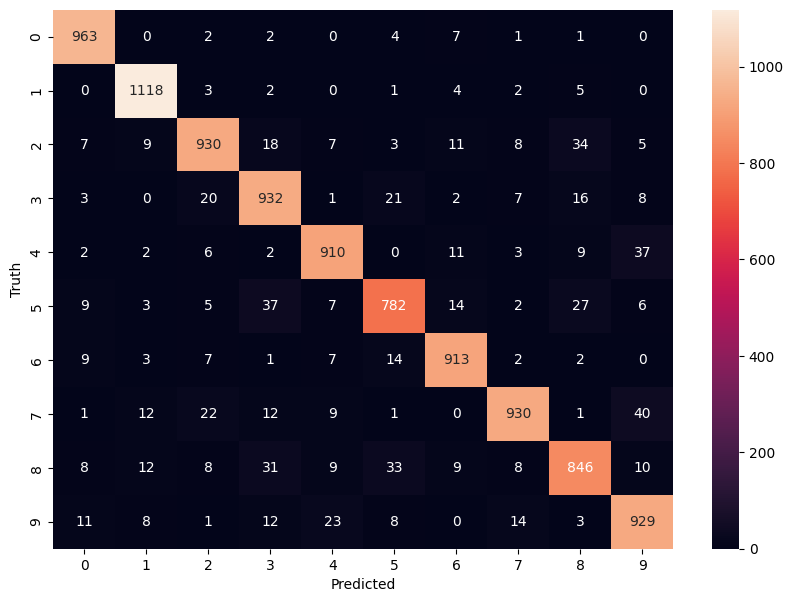

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

/Users/deepankarsingh/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 749us/step - accuracy: 0.8707 - loss: 0.4516
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.9629 - loss: 0.1238
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.9759 - loss: 0.0822
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.9819 - loss: 0.0600
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.9846 - loss: 0.0490


In [41]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
     keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - accuracy: 0.8737 - loss: 0.4379
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step - accuracy: 0.9663 - loss: 0.1108
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 827us/step - accuracy: 0.9770 - loss: 0.0706
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.9832 - loss: 0.0543
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step - accuracy: 0.9853 - loss: 0.0448
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - accuracy: 0.9882 - loss: 0.0365
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.9911 - loss: 0.0270
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 833us/step - accuracy: 0.9925 - loss: 0.0234
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 833us/step - accuracy: 0.9929 - loss: 0.0211
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - accuracy: 0.9951 - loss: 0.0151


In [39]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.9704 - loss: 0.0919


[0.07752332836389542, 0.9751999974250793]